# HH F-I curve

In [35]:
#Hodgkin-Huxley simulation (following Dayna & Abbott Ch 5). (Note: for Python at least, we need a simulation timestep of 0.01 ms since 0.1 ms causes numerical errors that make the result explode).

In [15]:
def HHmodel(i_e_a,T,showplot):
    c_m = .01  # uF/mm^2
    v_0 = -65  # mV
    m_0 = 0.0529
    h_0 = 0.5961
    n_0 = 0.3177

    g_l = 0.003  # mS/mm^2
    g_k = 0.36  # mS/mm^2
    g_na = 1.2  # mS/mm^2
    e_l = -54.387  # mV
    e_k = -77  # mV
    e_na = 50  # mV
    dt = 0.01  # ms (note: 0.1 ms yields pathological numerical errors!)

    #i_e_a = 0.2  # uA/mm^2

    #T = 50  # ms

    t = np.arange(0, T, dt)  # time vector (ms)

    v = np.nan * np.zeros(len(t))
    n = np.nan * np.zeros(len(t))
    m = np.nan * np.zeros(len(t))
    h = np.nan * np.zeros(len(t))

    tau_n = np.nan * np.zeros(len(t))
    n_inf = np.nan * np.zeros(len(t))
    tau_m = np.nan * np.zeros(len(t))
    m_inf = np.nan * np.zeros(len(t))
    tau_h = np.nan * np.zeros(len(t))
    h_inf = np.nan * np.zeros(len(t))

    v[0] = v_0
    n[0] = n_0
    m[0] = m_0
    h[0] = h_0

    # run simulation
    spike_counter=0;
    for t_idx in range(1, len(t)):

        # get prev v, n, m, and h
        v_ = v[t_idx-1]
        n_ = n[t_idx-1]
        m_ = m[t_idx-1]
        h_ = h[t_idx-1]

        # get tau and inf vars as func of voltage
        tau_n_, n_inf_ = get_n_vars(v_)
        tau_m_, m_inf_ = get_m_vars(v_)
        tau_h_, h_inf_ = get_h_vars(v_)

        # store tau and inf vars
        tau_n[t_idx] = tau_n_
        n_inf[t_idx] = n_inf_
        tau_m[t_idx] = tau_m_
        m_inf[t_idx] = m_inf_
        tau_h[t_idx] = tau_h_
        h_inf[t_idx] = h_inf_

        # update n, m, and h
        n[t_idx] = n_ + (dt/tau_n_) * (n_inf_ - n_)
        m[t_idx] = m_ + (dt/tau_m_) * (m_inf_ - m_)
        h[t_idx] = h_ + (dt/tau_h_) * (h_inf_ - h_)

        # get membrane current
        i_m = g_l*(v_ - e_l) + g_k*(n[t_idx]**4)*(v_ - e_k) + g_na*(m[t_idx]**3)*h[t_idx]*(v_ - e_na)

        # update voltage
        v[t_idx] = v_ + (dt/c_m)*(-i_m + i_e_a)
        if v[t_idx]>0 and v[t_idx-1]<0:
            spike_counter+=1;
        
    return v,t,spike_counter
            
    if showplot:
        # plot primary dynamical variables
        fig, axs = plt.subplots(2, 1, figsize=(15, 6), tight_layout=True)
        axs[0].plot(t, v, lw=3)
        axs[0].set_ylabel('Voltage (mV)')
        axs[1].plot(t, n, lw=3)
        axs[1].plot(t, m, lw=3)
        axs[1].plot(t, h, lw=3)
        axs[1].set_ylabel('n, m, h')
        axs[1].legend(['n', 'm', 'h'])

        for ax in axs:
            ax.set_xlabel('Time (ms)')
            set_font_size(ax, 16)

        # plot auxiliary variables
        fig, axs = plt.subplots(2, 1, figsize=(15, 6), tight_layout=True)
        axs[0].plot(t, n_inf, lw=3)
        axs[0].plot(t, m_inf, lw=3)
        axs[0].plot(t, h_inf, lw=3)
        axs[0].set_ylabel('n_inf, m_inf, h_inf')
        axs[0].legend(['n_inf', 'm_inf', 'h_inf'])

        axs[1].plot(t, tau_n, lw=3)
        axs[1].plot(t, tau_m, lw=3)
        axs[1].plot(t, tau_h, lw=3)
        axs[1].set_ylabel('tau_n, tau_m, tau_h')
        axs[1].legend(['tau_n', 'tau_m', 'tau_h'])

        for ax in axs:
            set_font_size(ax, 16)

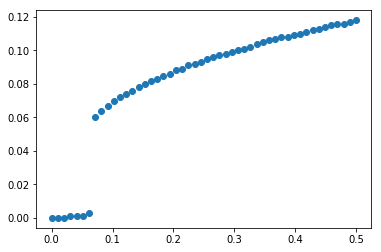

In [33]:
# Define Current parameters
total_current_steps= 50;
Ivec=np.linspace(0,0.5,total_current_steps)

#initialize variables
firing_rate = np.zeros(total_current_steps)

# Final time
T=1000

######################################### Run loop

for j in range(total_current_steps):
    i_e_a=Ivec[j]
    spikes_counter=0
    v,t,spikes_counter=HHmodel(i_e_a,T,False)
    firing_rate[j]=spikes_counter/T;   
    
fig,ax=plt.subplots(1)
ax.plot(Ivec,firing_rate,'o')
plt.show()
ax.set_xlabel('I')
ax.set_ylabel('Firing rate')
#ax.legend(['HH','LIF'])
fig.savefig('FICurve-HH.pdf')    